In [1]:
import os
import pandas as pd
import numpy as np
import json
from sklearn import preprocessing    

In [5]:
def writetrainann(file):
    maxl = 0
    columns = ['name', 'label']
    names = []
    labels = []
    categories = []
    with open(file, 'r') as f:
        ann = json.loads(f.read())
        for key in ann.keys():
            img_dict = ann[key]
            img_name = img_dict['name']
            cat_list = img_dict['category']
            maxl = max(maxl, len(cat_list))
            categories.extend(cat_list)
            
            for cat in cat_list:
                names.append(img_name)
                labels.append(cat)
                
        data = pd.DataFrame(list(zip(names, labels)), columns=columns)
        print('Maximum categories per image', maxl)
        print('Total number of categories', len(set(categories)))
        print('All categories', set(categories))
        data.to_csv('../Data/train_ann.csv', index = False)                   

In [9]:
ann_dir = "../../../Data/annotation"
train_fname = 'i2l_trainset_annotation.json'
train_fname = os.path.join(ann_dir, train_fname)
train_data = writetrainann(train_fname)

Maximum categories per image 9
Total number of categories 79
All categories {'frisbee', 'microwave', 'chair', 'orange', 'cup', 'keyboard', 'scissors', 'vase', 'hot dog', 'cell phone', 'stop sign', 'car', 'tv', 'laptop', 'skis', 'bottle', 'sink', 'broccoli', 'fork', 'book', 'horse', 'sports ball', 'tie', 'skateboard', 'truck', 'toothbrush', 'sandwich', 'cake', 'bowl', 'bicycle', 'dog', 'spoon', 'bird', 'apple', 'tennis racket', 'bear', 'suitcase', 'dining table', 'parking meter', 'couch', 'elephant', 'backpack', 'banana', 'remote', 'umbrella', 'sheep', 'clock', 'giraffe', 'wine glass', 'knife', 'bus', 'baseball bat', 'handbag', 'bed', 'cat', 'baseball glove', 'traffic light', 'kite', 'carrot', 'fire hydrant', 'hair drier', 'train', 'potted plant', 'teddy bear', 'donut', 'toaster', 'pizza', 'bench', 'surfboard', 'toilet', 'mouse', 'motorcycle', 'airplane', 'cow', 'zebra', 'refrigerator', 'snowboard', 'boat', 'oven'}


Max Freq category: chair
Min Freq category: bear
Mean Freq: 599.620253164557


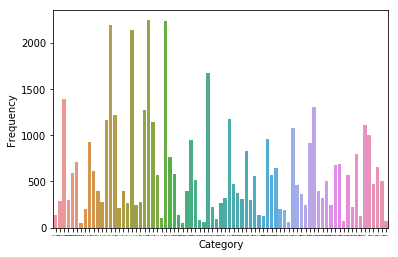

In [113]:
# Checking training examples per-class. Dataset Stats

train_data = pd.read_csv('../Data/train_ann.csv')
train_groups = train_data.groupby(['label'])
count_df = train_groups.agg('count')

print('Max Freq category:', train_data['label'].value_counts().idxmax())
print('Min Freq category:',train_data['label'].value_counts().idxmin())
print('Mean Freq:',train_data['label'].value_counts().mean())
count_df = count_df.reset_index()

count_df = count_df.rename(columns={"name": "Frequency", "label":"Category"})
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(x = "Category", y = "Frequency", data = count_df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=2)
plt.savefig("cate.png", dpi=300)

In [ ]:
# Encoding labels (0-78)

train_data = pd.read_csv('../Data/train_ann.csv')
le = preprocessing.LabelEncoder()
train_data['label_enc'] = le.fit_transform(train_data['label'])
train_data.to_csv('../Data/train_ann_encoded.csv', index = False)   

label_enc_dict = pd.Series(train_data.label_enc.values,index=train_data.label).to_dict()
print(label_enc_dict)

label_enc_json = json.dumps(label_enc_dict)
f = open("../Data/labels.json","w")
f.write(label_enc_json)
f.close()

In [17]:
def writeann_multilabel(file):
    maxl = 0
    columns = ['name', 'label']
    names = []
    labels = []
    with open(file, 'r') as f:
        ann = json.loads(f.read())
        for key in ann.keys():
            img_dict = ann[key]
            img_name = img_dict['name']
            cat_list = img_dict['category']
            maxl = max(maxl, len(cat_list))
            category = " ".join(cat_list)
            names.append(img_name)
            labels.append(category)
        
        data = pd.DataFrame(list(zip(names, labels)), columns=columns)
        data.to_csv('../Data/train_ml_ann.csv', index = False)                   

In [18]:
ann_dir = "../../../Data/annotation"
train_fname = 'i2l_trainset_annotation.json'
train_fname = os.path.join(ann_dir, train_fname)
writeann_multilabel(train_fname)

                    name                   label
0  000000016164_left.png                     dog
1  000000471175_left.png                     dog
2  000000026654_left.png                     dog
3  000000158497_left.png  spoon refrigerator dog
4  000000390348_left.png                     dog
5  000000369190_left.png                     dog
6  000000151988_left.png              bottle dog
7  000000307993_left.png                book dog
8  000000007125_left.png                     dog
9  000000346965_left.png                     dog


In [23]:
def writeann_multilabel_enc(file):
    
    with open("../Data/labels.json","r") as f:
        encodings = json.loads(f.read())
    
    maxl = 0
    columns = ['name', 'label']
    names = []
    labels = []
    with open(file, 'r') as f:
        ann = json.loads(f.read())
        for key in ann.keys():
            img_dict = ann[key]
            img_name = img_dict['name']
            cat_list = img_dict['category']
            maxl = max(maxl, len(cat_list))
            cat_labels = []
            for cat in cat_list:
                cat_labels.append(encodings[cat])
            
            category = cat_labels
            names.append(img_name)
            labels.append(category)
        
        data = pd.DataFrame(list(zip(names, labels)), columns=columns)
        print(data.head(5))
        data.to_csv('../Data/train_ml_ann_encoded.csv', index = False) 

In [24]:
# Applying label encoding on trainig_multilabel data

ann_dir = "../../../Data/annotation"
train_fname = 'i2l_trainset_annotation.json'
train_fname = os.path.join(ann_dir, train_fname)
writeann_multilabel_enc(train_fname)

                    name         label
0  000000016164_left.png          [28]
1  000000471175_left.png          [28]
2  000000026654_left.png          [28]
3  000000158497_left.png  [60, 51, 28]
4  000000390348_left.png          [28]


In [54]:
def writevalann(file):
    maxl = 0
    columns = ['name', 'label', 'WC1', 'WC2', 'WC3', 'WC4']
    names = []
    labels = []
    WC1 = []
    WC2 = []
    WC3 = []
    WC4 = []
    with open(file, 'r') as f:
        ann = json.loads(f.read())
        for key in ann.keys():
            img_dict = ann[key]
            img_name = img_dict['name']
            correct_cand = img_dict['correct_candidate']
            wrong_cands = img_dict['wrong_candidate'] # four element always
            names.append(img_name)
            labels.append(correct_cand[0]) # only one element always
            WC1.append(wrong_cands[0])
            WC2.append(wrong_cands[1])
            WC3.append(wrong_cands[2])
            WC4.append(wrong_cands[3])
    
        data = pd.DataFrame(list(zip(names, labels, WC1, WC2, WC3, WC4)), columns=columns)
        data.to_csv('../Data/val_ann.csv', index = False)

In [55]:
ann_dir = "../../../Data/annotation"
val_fname = 'i2l_valset_annotation.json'
val_fname = os.path.join(ann_dir, val_fname)
writevalann(val_fname)

                    name          label       WC1         WC2            WC3  \
0  000000116358_left.png    sports ball     sheep       apple       backpack   
1  000000050179_left.png  tennis racket  airplane    elephant            tie   
2  000000523571_left.png   dining table       car     frisbee     cell phone   
3  000000531798_left.png           bowl      cake  wine glass     teddy bear   
4  000000531798_left.png         banana    toilet         cup  parking meter   

     WC4  
0  mouse  
1   kite  
2  pizza  
3  clock  
4   vase  


In [56]:
def writetestann(file):
    maxl = 0
    columns = ['name', 'label', 'WC1', 'WC2', 'WC3', 'WC4']
    names = []
    labels = []
    WC1 = []
    WC2 = []
    WC3 = []
    WC4 = []
    with open(file, 'r') as f:
        ann = json.loads(f.read())
        for key in ann.keys():
            img_dict = ann[key]
            img_name = img_dict['name']
            correct_cand = img_dict['correct_candidate']
            wrong_cands = img_dict['wrong_candidate'] # four element always
            names.append(img_name)
            labels.append(correct_cand[0]) # only one element always
            WC1.append(wrong_cands[0])
            WC2.append(wrong_cands[1])
            WC3.append(wrong_cands[2])
            WC4.append(wrong_cands[3])
    
        data = pd.DataFrame(list(zip(names, labels, WC1, WC2, WC3, WC4)), columns=columns)
        data.to_csv('../Data/test_ann.csv', index = False)

In [57]:
ann_dir = "../../../Data/annotation"
test_fname = 'i2l_testset_annotation.json'
test_fname = os.path.join(ann_dir, test_fname)
writetestann(test_fname)

In [16]:
# Applying label encoding on test and validation data (using labels applied for training)
val_data = pd.read_csv('../Data/val_ann.csv')
test_data = pd.read_csv('../Data/test_ann.csv')

with open("../Data/labels.json","r") as f:
    encodings = json.loads(f.read())
    for col in val_data.columns[1:]:
        val_data[col].replace(encodings, inplace=True)
        
    for col in test_data.columns[1:]:
        test_data[col].replace(encodings, inplace=True)

val_data.to_csv('../Data/val_ann_encoded.csv', index = False)  
test_data.to_csv('../Data/test_ann_encoded.csv', index = False)  

    Loading Data in training mode
0                      Epoch 1/99
1                      ----------
2  train Loss: 0.0518 Acc: 0.1600
3  val Loss: 223.5253 Acc: 0.7188
4                      Epoch 2/99


    Loading Data in training mode
0                      Epoch 0/99
1                      ----------
2  train Loss: 0.0744 Acc: 0.0921
3    val Loss: 0.0617 Acc: 0.6310
4                      Epoch 1/99
     Loading Data in training mode
2   train Loss: 0.0744 Acc: 0.0921
6   train Loss: 0.0586 Acc: 0.1246
10  train Loss: 0.0569 Acc: 0.1364
14  train Loss: 0.0560 Acc: 0.1442
18  train Loss: 0.0554 Acc: 0.1517
   Loading Data in training mode
3   val Loss: 0.0617 Acc: 0.6310
7   val Loss: 0.0586 Acc: 0.6522
11  val Loss: 0.0569 Acc: 0.6803
15  val Loss: 0.0565 Acc: 0.6930
19  val Loss: 0.0558 Acc: 0.7026


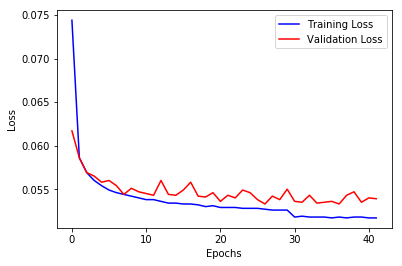

In [120]:
data = pd.read_csv('model_gcn_baseline_tuned_False.txt', sep = "\n")
print(data.head(5))
# r - 1 factor of 4
rows = data.shape[0]
train_r = []
val_r = []
for r in range(1, rows):
    if (r - 2) % 4 == 0:
        train_r.append(r)
    elif (r - 3) % 4 == 0:
        val_r.append(r)

train_df = data.loc[train_r]
val_df = data.loc[val_r]


train_loss = []
val_loss = []

print(train_df.head(5))
print(val_df.head(5))
for r in range(train_df.shape[0]):
    s = str(train_df.iloc[r])
#     print(s.split(" "))
    train_loss.append(float(s.split(" ")[10]))

ignore = []
for r in range(val_df.shape[0]):
    s = str(val_df.iloc[r])
    val_loss.append(float(s.split(" ")[10]))
    if float(s.split(" ")[10]) > 1.00:
        ignore.append(r)
    
train_loss_f = []
val_loss_f = []
for r in range(train_df.shape[0]):
    if r in ignore:
        continue
    train_loss_f.append(train_loss[r])
    val_loss_f.append(val_loss[r])
    
import matplotlib.pyplot as plt
plt.plot(train_loss_f, 'b', label='Training Loss')
plt.plot(val_loss_f, 'r', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('model_gcn_baseline_tuned_False.png', dpi=300)

                                      Epoch 0/99
0                                     ----------
1  train Loss: 0.0652 Acc: 0.1448 Recall: 0.0003
2    val Loss: 0.0644 Acc: 0.1685 Recall: 0.0002
3                                     Epoch 1/99
4                                     ----------
                                       Epoch 0/99
1   train Loss: 0.0652 Acc: 0.1448 Recall: 0.0003
5   train Loss: 0.0641 Acc: 0.1455 Recall: 0.0002
9   train Loss: 0.0642 Acc: 0.1445 Recall: 0.0003
13  train Loss: 0.0641 Acc: 0.1446 Recall: 0.0003
17  train Loss: 0.0640 Acc: 0.1453 Recall: 0.0002
                                     Epoch 0/99
2   val Loss: 0.0644 Acc: 0.1685 Recall: 0.0002
6   val Loss: 0.0637 Acc: 0.1273 Recall: 0.0000
10  val Loss: 0.0631 Acc: 0.1552 Recall: 0.0000
14  val Loss: 0.0655 Acc: 0.1523 Recall: 0.0004
18  val Loss: 0.0678 Acc: 0.1089 Recall: 0.0001
['Epoch', '0/99', '', '', '', 'train', 'Loss:', '0.0652', 'Acc:', '0.1448', 'Recall:', '0.0003\nName:', '1,', 'dtype:'

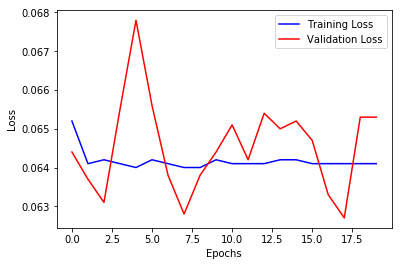

In [116]:
# VG Data
data = pd.read_csv('model_glore_vg_False.txt', sep = "\n")
print(data.head(5))

# r - 1 factor of 4
rows = data.shape[0]
train_r = []
val_r = []
for r in range(1, rows):
    if (r - 1) % 4 == 0:
        train_r.append(r)
    elif (r - 2) % 4 == 0:
        val_r.append(r)

train_df = data.loc[train_r]
val_df = data.loc[val_r]


train_loss = []
val_loss = []

print(train_df.head(5))
print(val_df.head(5))
for r in range(train_df.shape[0]):
    s = str(train_df.iloc[r])
    print(s.split(" "))
    train_loss.append(float(s.split(" ")[7]))

ignore = []
for r in range(val_df.shape[0]):
    s = str(val_df.iloc[r])
    val_loss.append(float(s.split(" ")[7]))
    
    
    
import matplotlib.pyplot as plt
plt.plot(train_loss, 'b', label='Training Loss')
plt.plot(val_loss, 'r', label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('model_glore_vg_False.png', dpi=300)